In [1]:
%matplotlib inline

import data_reader, data_preprocessor, trajectory_plotter, os
import random, importlib
import matplotlib.pyplot as plt

plt.rc('figure', dpi=150)

importlib.reload(data_reader)
importlib.reload(data_preprocessor)
importlib.reload(trajectory_plotter)

dr = data_reader.DataReader()
dp = data_preprocessor.DataPreprocessor()
tp = trajectory_plotter.TrajectoryPlotter()

index = ['subj_id', 'session_no', 'block_no', 'trial_no']

In [2]:
choices, dynamics, stim_viewing = dr.get_data(path='../../data/HEM_exp_1/merged_raw/', 
                                                  stim_viewing=True, test_mode=False)
dynamics = dp.preprocess_data(choices, dynamics)
stim_viewing = dp.preprocess_data(choices, stim_viewing)

In [3]:
choices = dp.get_mouse_and_gaze_measures(choices, dynamics)

In [8]:
choices['early_it'] = stim_viewing.groupby(level=index).apply(
        lambda traj: traj.timestamp.max()-traj.timestamp[traj.mouse_dx==0].iloc[-1])

choices['stim_response'] = choices['early_it'] != 0
choices['early_response'] = choices['initiation_time'] == 0

choices.groupby(['stim_response', 'early_response']).size().unstack()

early_response,False,True
stim_response,,
False,8185,517
True,60,838


[-26. -26. -26. -25. -25.]
[ 0.  0.  0.  0.  0.]
[-12. -12. -12. -12. -10.]
[ 0.  0.  0.  0.  0.]
[-10.  -9.  -8.  -7.  -7.]
[ 0.  0.  0.  0.  0.]
[-25. -25. -25. -25. -25.]
[ 0.  0. -1. -1. -1.]


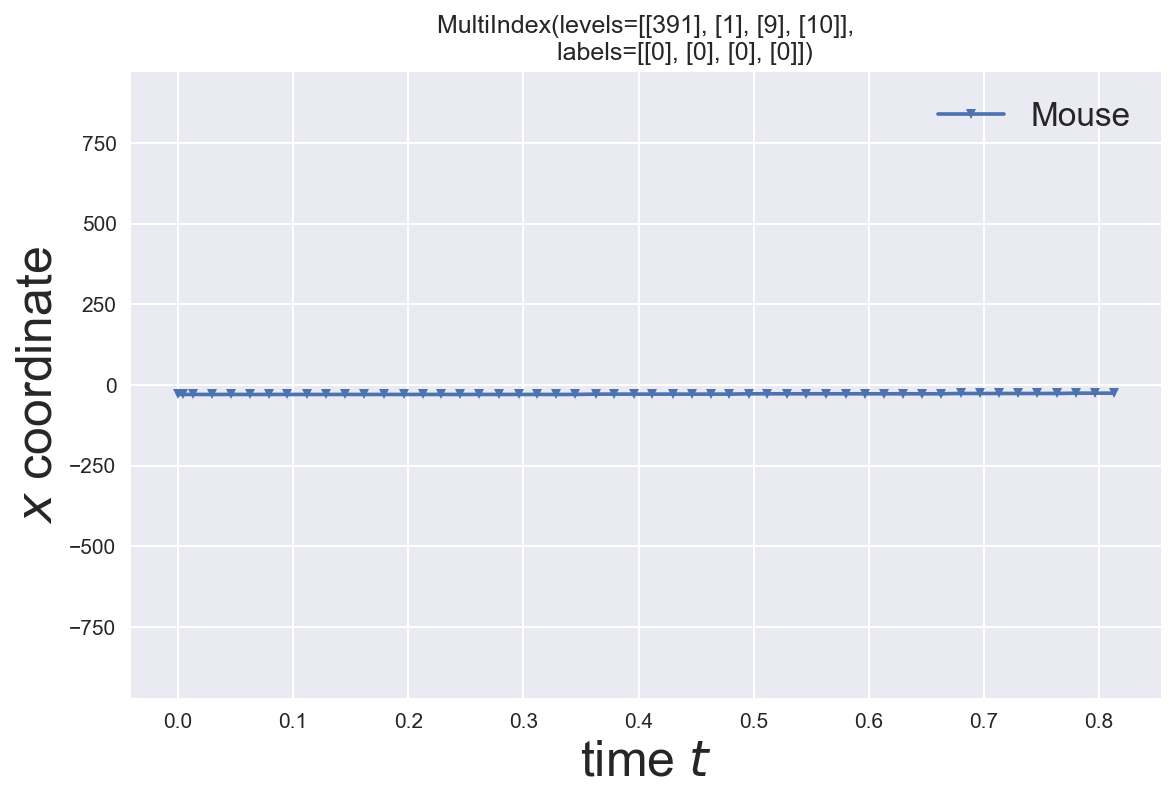

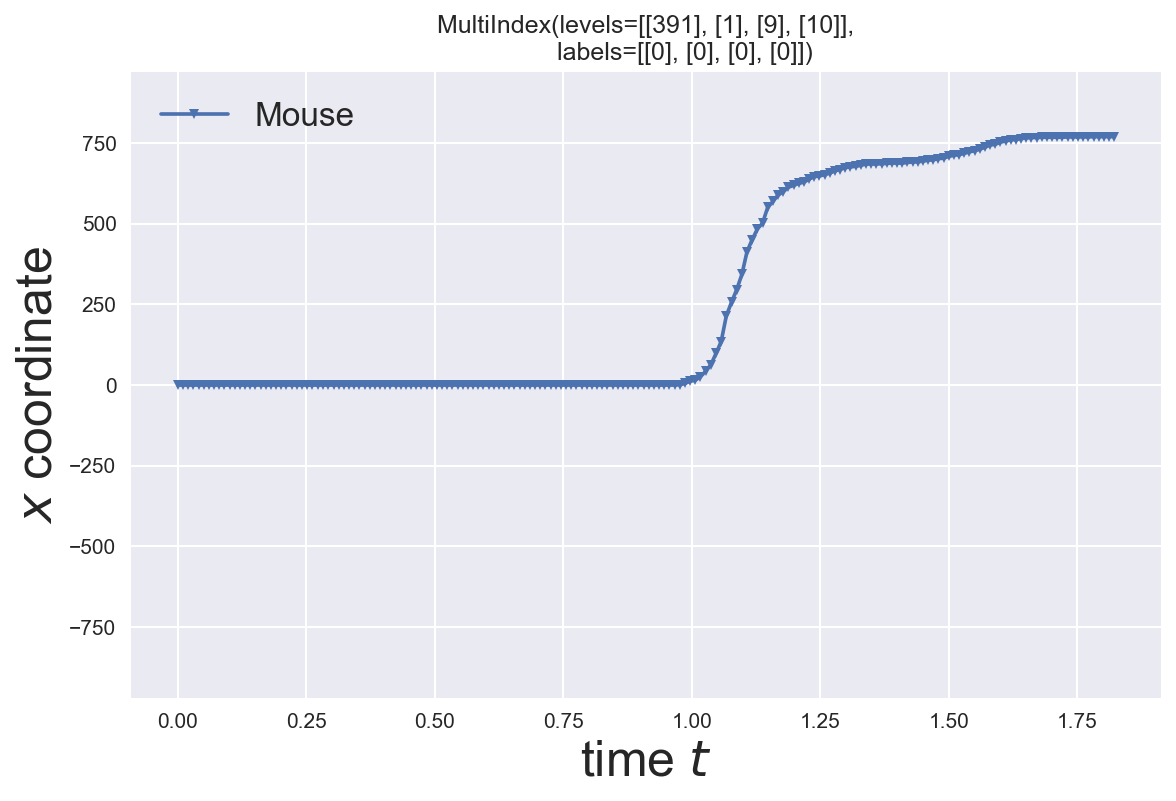

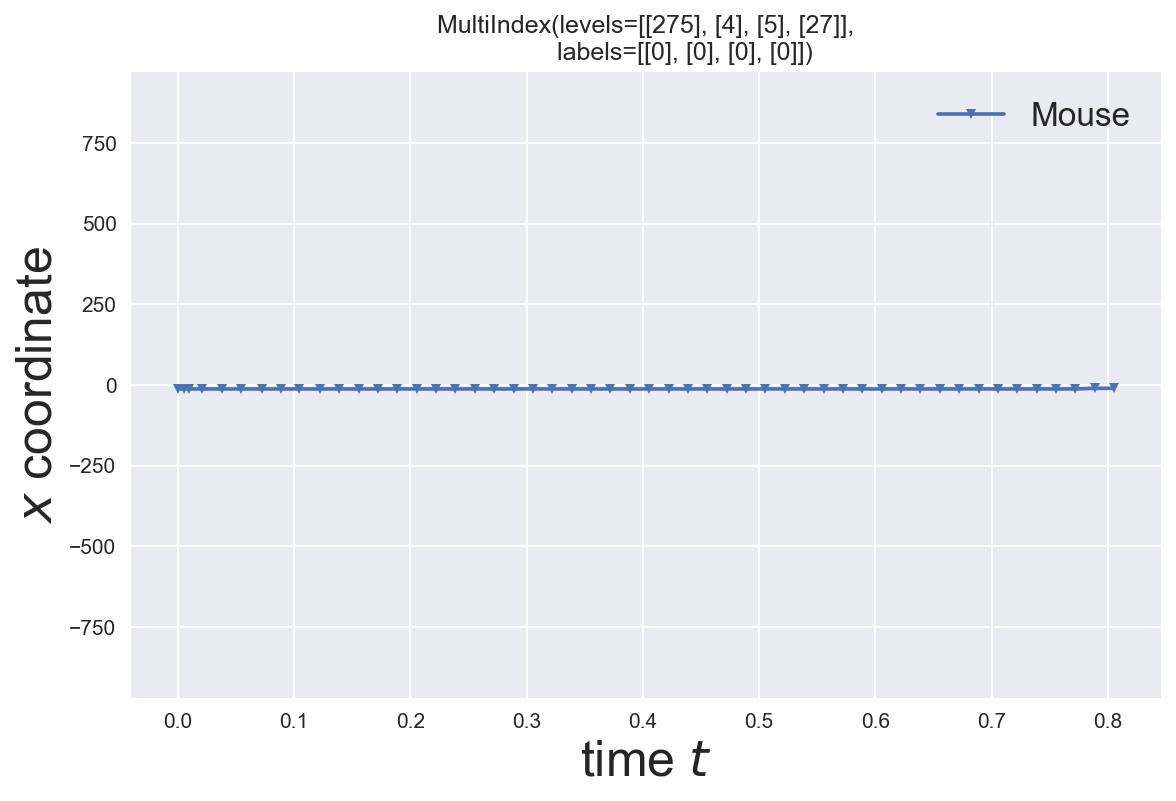

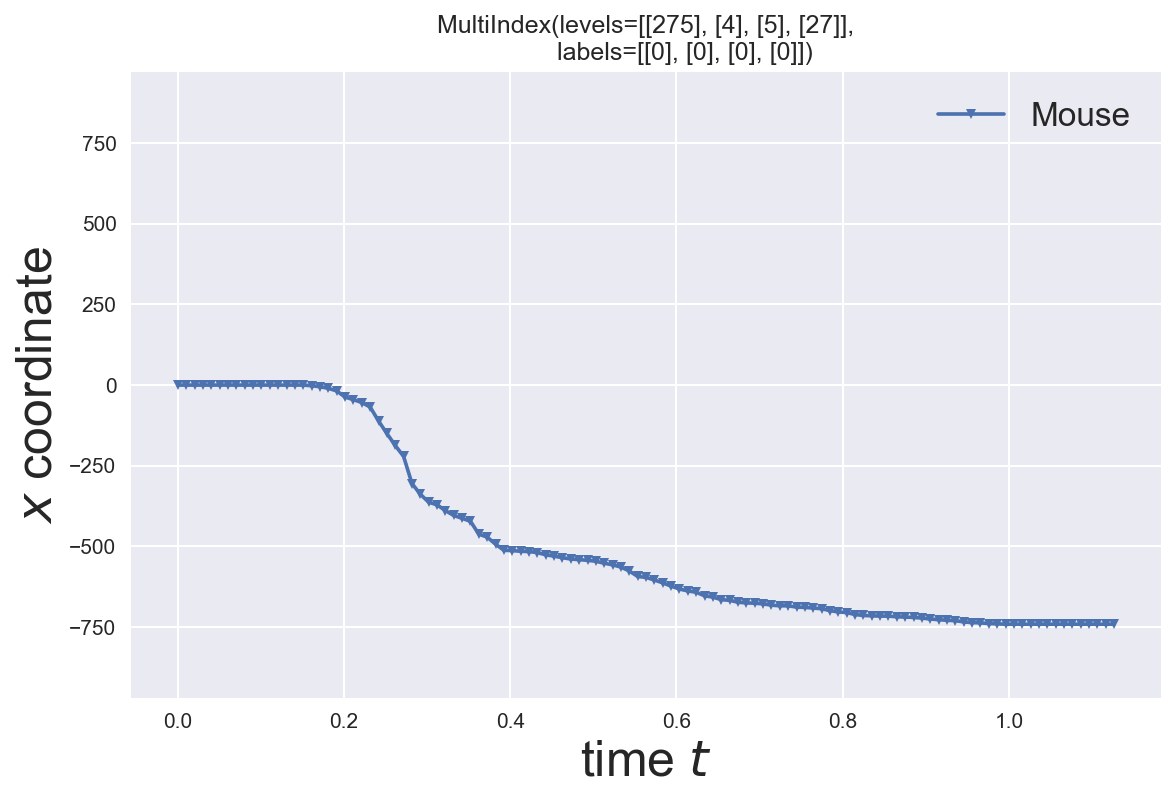

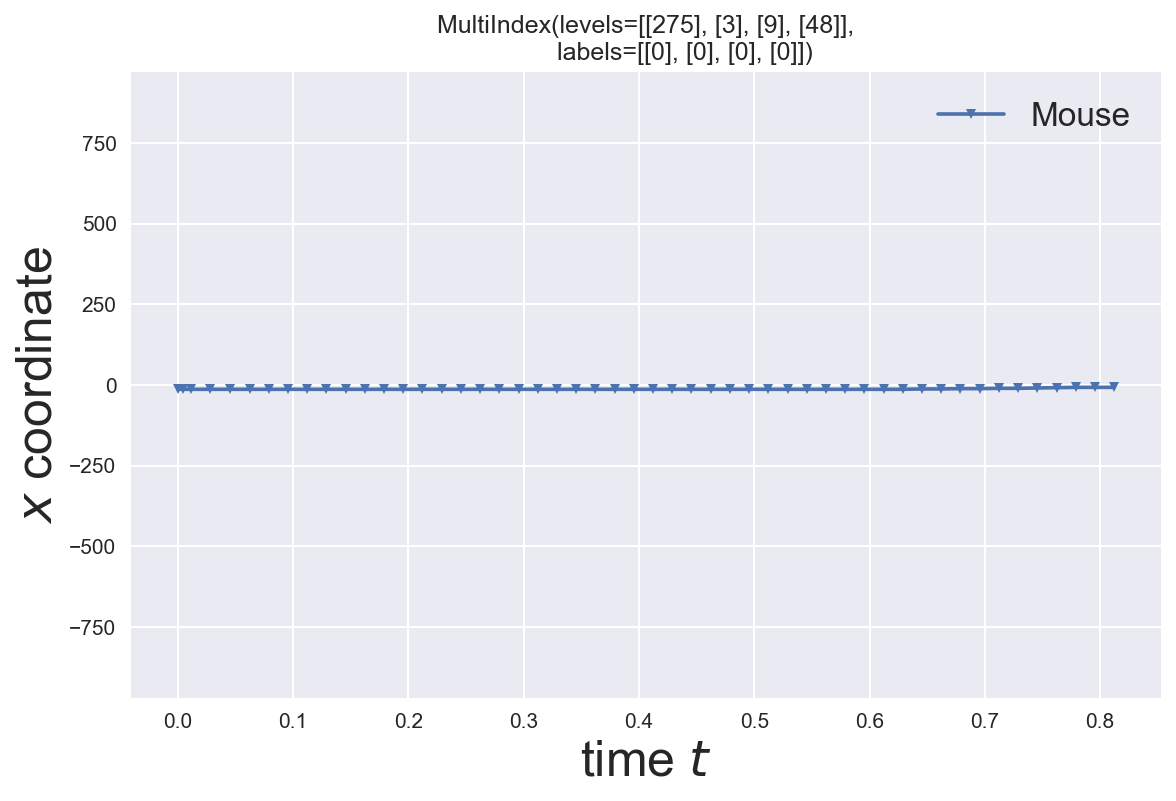

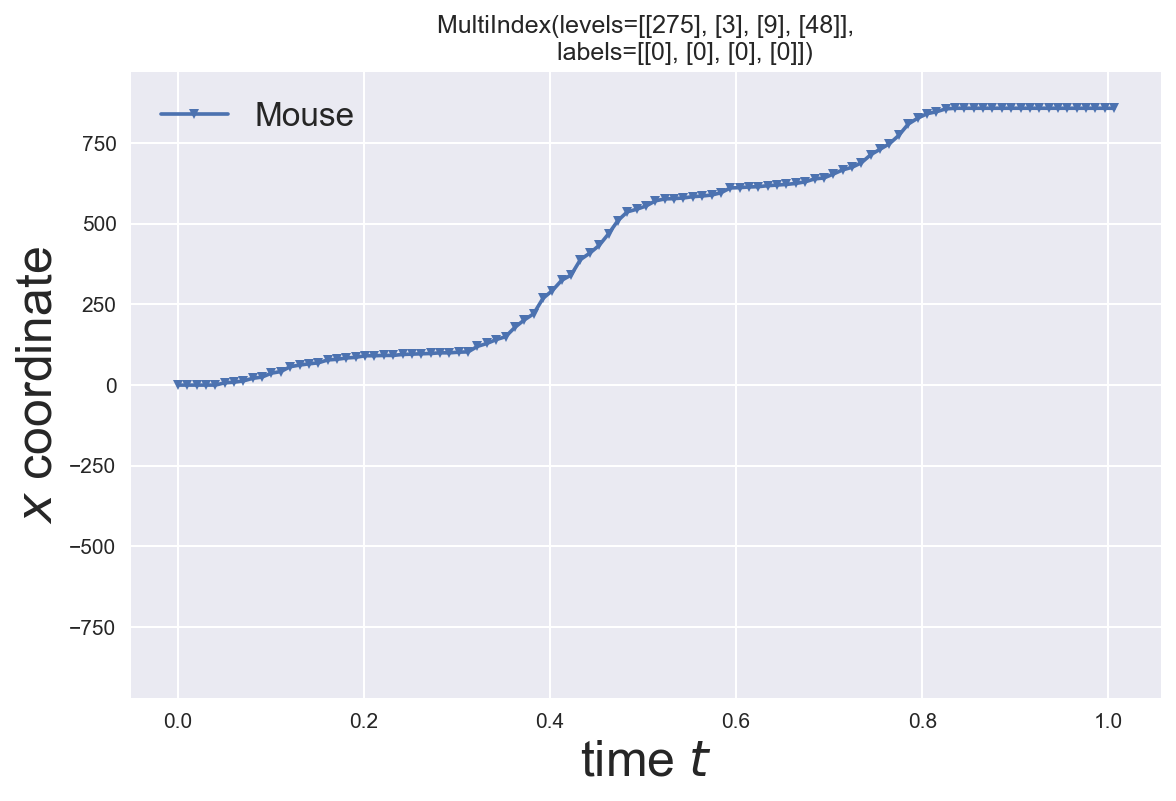

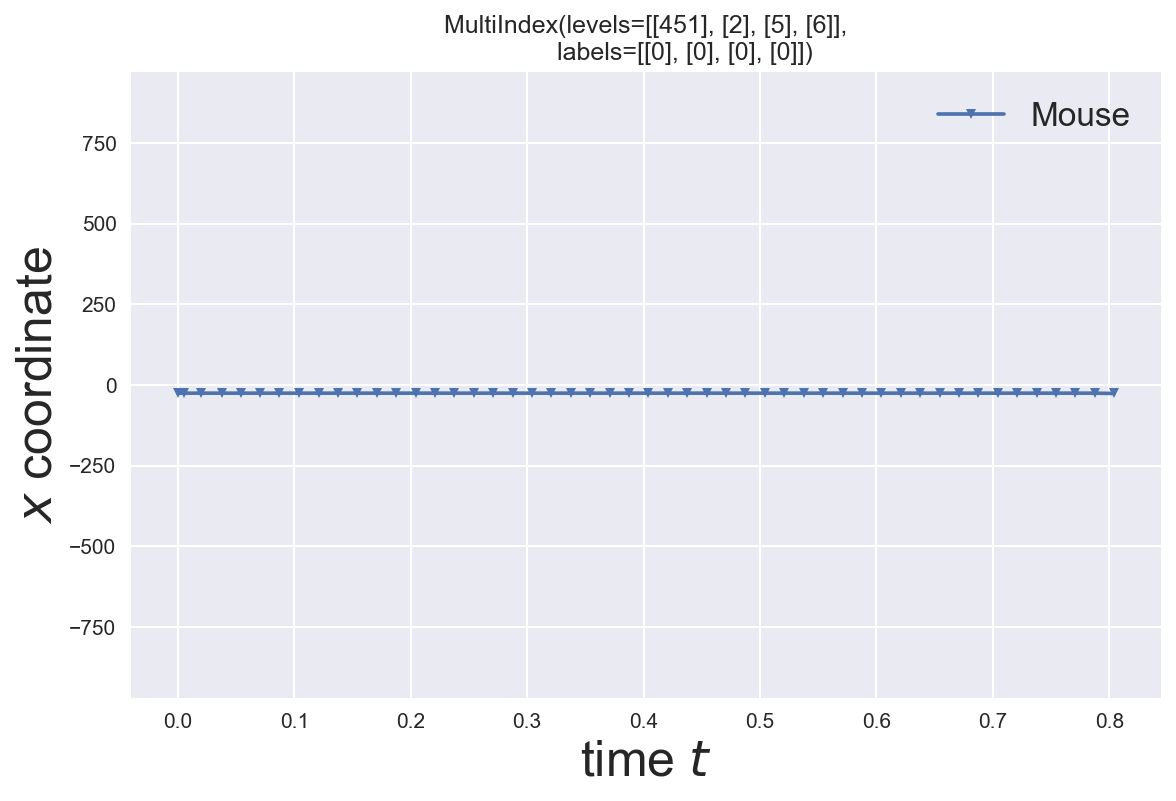

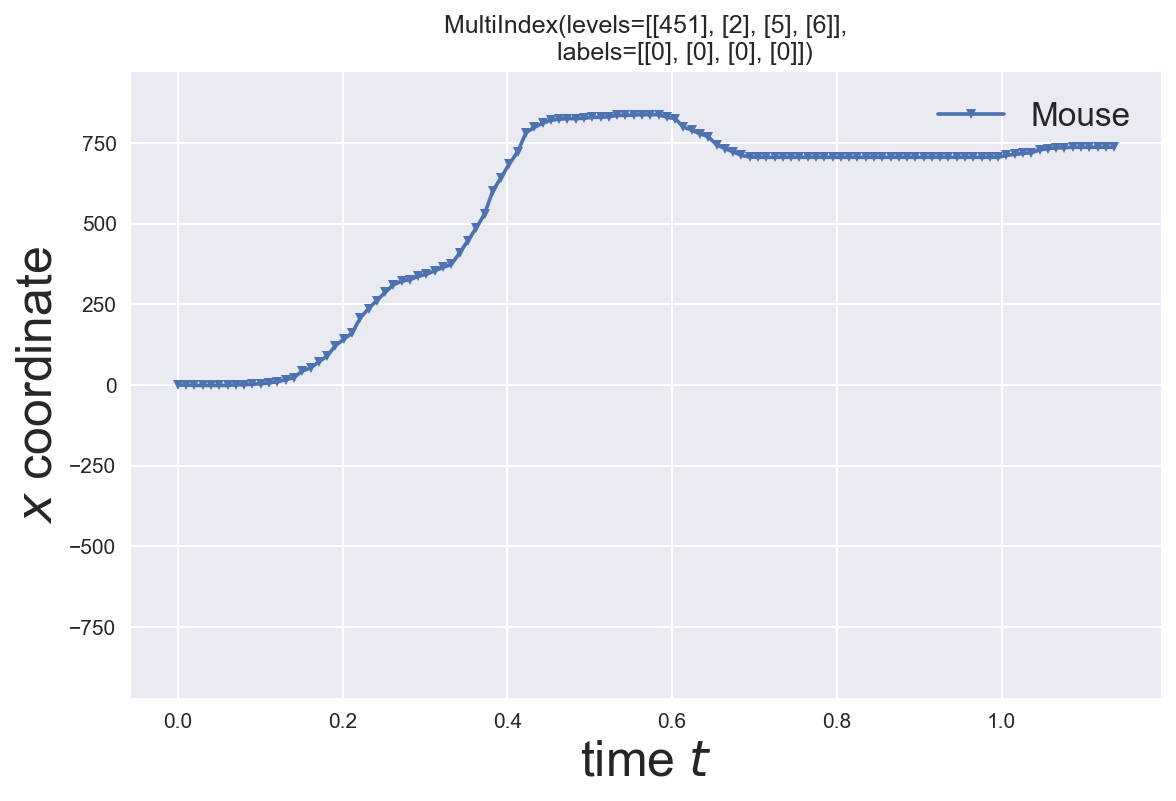

In [5]:
choices_tmp = choices[(~choices.early_response) & (choices.stim_response)]

for i in range(1,5):
    choice = random.sample(list(choices_tmp.index), 1)
    stim = stim_viewing.loc[choice]
    traj = dynamics.loc[choice]
    print(stim.mouse_x.values[-6:-1])
    print(traj.mouse_x.values[:5])    
    tp.plot_trajectory_x(stim, v=False, eye=False)
    tp.plot_trajectory_x(traj, v=False, eye=False)